### General Overview of DataFrame

In [42]:
import numpy as np
import pandas as pd
import os
print(os.listdir('../separated_jobs'))

['.ipynb_checkpoints', '3d_specialist.csv', 'academic_professor.csv', 'ai_engineer.csv', 'analyst_roles.csv', 'app_developer.csv', 'artificial_intelligence_researcher.csv', 'automation_engineer.csv', 'backend-developer.csv', 'blockchain_developer.csv', 'business_analyst.csv', 'c#_developer.csv', 'c++_developer.csv', 'cloud_engineer.csv', 'content_writer.csv', 'cybersecurity_specialist.csv', 'data_analyst.csv', 'data_base_administrator.csv', 'data_scientist.csv', 'developer_roles.csv', 'devops_engineer.csv', 'digital_marketing_specialist.csv', 'electronics_engineer.csv', 'firmware_engineer.csv', 'freelancer.csv', 'front-end_developer.csv', 'full-stack_developer.csv', 'game_developer.csv', 'graphics_designer.csv', 'hardware_engineer.csv', 'integration_engineer.csv', 'it_specialist.csv', 'java_developer.csv', 'lead_engineer.csv', 'machine_learning_engineer.csv', 'manager_roles.csv', 'mechanical_engineer.csv', 'network_engineer.csv', 'other.csv', 'product_manager.csv', 'python_developer.cs

In [43]:
df_cyber = pd.read_csv('../separated_jobs/cybersecurity_specialist.csv')

In [44]:
display(df_cyber.head())

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,cloudsek,Threat Intelligence Researcher,Delhi,0.0,"Encryption, Machine learning, Cybersecurity, C...",3.8,Cybersecurity Specialist
1,cloudsek,Cyber Security Analyst/ Researcher,Bengaluru,550000.0,"Penetration testing, Encryption, Java, Firewal...",3.8,Cybersecurity Specialist
2,cloudsek,Threat Intelligence Researcher - Dark/Deep Web,Bengaluru,550000.0,"Go, Encryption, Research, Information security...",3.8,Cybersecurity Specialist
3,Nouveau Labs,Cyber Threat Researcher,Bengaluru,500000.0,"Research, Information security, Analysis skill...",3.8,Cybersecurity Specialist
4,News Corp,"Analyst, Cyber Threat Intelligence",Bengaluru,450000.0,"Writing skills, Research, Information security...",3.4,Cybersecurity Specialist


### Handling Null Values

In [46]:
display(df_cyber.isnull().sum())

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    9
company_rating           45
standardized_job_role     0
dtype: int64

In [47]:
display(df_cyber[df_cyber['salary_pa'] == 0])

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,cloudsek,Threat Intelligence Researcher,Delhi,0.0,"Encryption, Machine learning, Cybersecurity, C...",3.8,Cybersecurity Specialist
5,Fortinet,Cyber Threat Intelligence Analyst,Pune,0.0,"Writing skills, Arabic, English, Japanese, Res...",3.8,Cybersecurity Specialist
6,Compile,Lead Cyber Threat Intelligence Analyst,Remote,0.0,"Information security, Scripting, APIs, SIEM, F...",4.0,Cybersecurity Specialist
10,KLDiscovery,Information Security Analyst (Remote),Remote,0.0,"Azure, FedRAMP, PCI, Customer service, Encryption",3.8,Cybersecurity Specialist
11,Wolters Kluwer,Jr Risk Analyst,India,0.0,"Information security, Risk management",3.7,Cybersecurity Specialist
...,...,...,...,...,...,...,...
249,Leeway Softech,Cyber Security Engineer(Cisa Certified),India,0.0,Cybersecurity,NaN,Cybersecurity Specialist
254,SISL Infotech,Information Security Engineer(6 years and abov...,India,0.0,Information security,4.1,Cybersecurity Specialist
255,"Deltek, Inc.","Manager, Security Engineering",Remote,0.0,"Authentication, Cloud infrastructure, Azure, S...",4.5,Cybersecurity Specialist
260,Ericsson,Senior IP Security Engineer,Noida,0.0,"Node.js, OSPF, Firewall, Analysis skills, Netw...",4.0,Cybersecurity Specialist


In [48]:
df_cyber['salary_pa'] = df_cyber['salary_pa'].astype(float) / 100000
df_cyber.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [49]:
df_cyber['company_rating'] = df_cyber['company_rating'].fillna(0)

In [50]:
avg_salary_by_rating = df_cyber[df_cyber['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()

In [51]:


def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0 or pd.isna(row['salary_lpa']):  
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  
            return avg_salary_by_rating[rating]
        else:  
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  

df_cyber['salary_lpa'] = df_cyber.apply(
    lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1
)


### Salary Distribution On The Basis of Skills

In [53]:

df_cyber['skills'] = df_cyber['skills'].str.split(',\s*')


df_skills = df_cyber.explode('skills')
df_skills = df_skills.drop_duplicates().reset_index(drop = True)


In [54]:
import seaborn as sns
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills


df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]

C:\Users\rhyth\AppData\Local\Temp\ipykernel_3032\3667392867.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


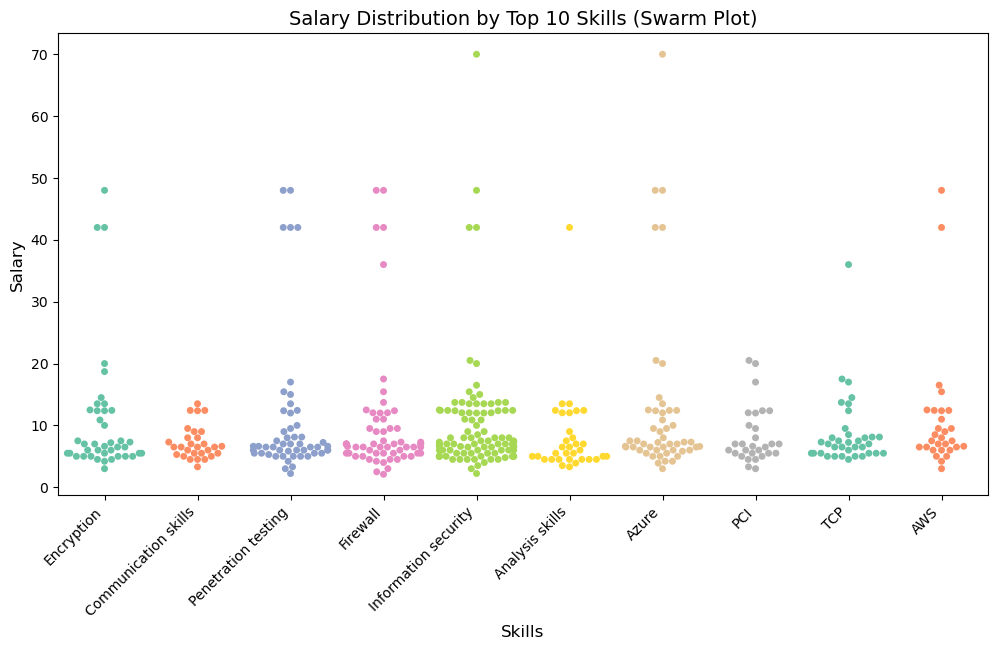

In [55]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title("Salary Distribution by Top 10 Skills (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Most Demanding Skills

In [57]:

all_skills = [skill for sublist in df_cyber['skills'].dropna() for skill in sublist]
df_cyber.head()

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,cloudsek,Threat Intelligence Researcher,Delhi,12.37037,"[Encryption, Machine learning, Cybersecurity, ...",3.8,Cybersecurity Specialist
1,cloudsek,Cyber Security Analyst/ Researcher,Bengaluru,5.50000,"[Penetration testing, Encryption, Java, Firewa...",3.8,Cybersecurity Specialist
2,cloudsek,Threat Intelligence Researcher - Dark/Deep Web,Bengaluru,5.50000,"[Go, Encryption, Research, Information securit...",3.8,Cybersecurity Specialist
3,Nouveau Labs,Cyber Threat Researcher,Bengaluru,5.00000,"[Research, Information security, Analysis skil...",3.8,Cybersecurity Specialist
4,News Corp,"Analyst, Cyber Threat Intelligence",Bengaluru,4.50000,"[Writing skills, Research, Information securit...",3.4,Cybersecurity Specialist


In [58]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                    Skill  Count
9    Information security     94
6                Firewall     59
4     Penetration testing     51
26                  Azure     49
0              Encryption     41
..                    ...    ...
37      Quality assurance      1
39              Databases      1
131               ASP.NET      1
130               Fiddler      1
206                   SEO      1

[207 rows x 2 columns]


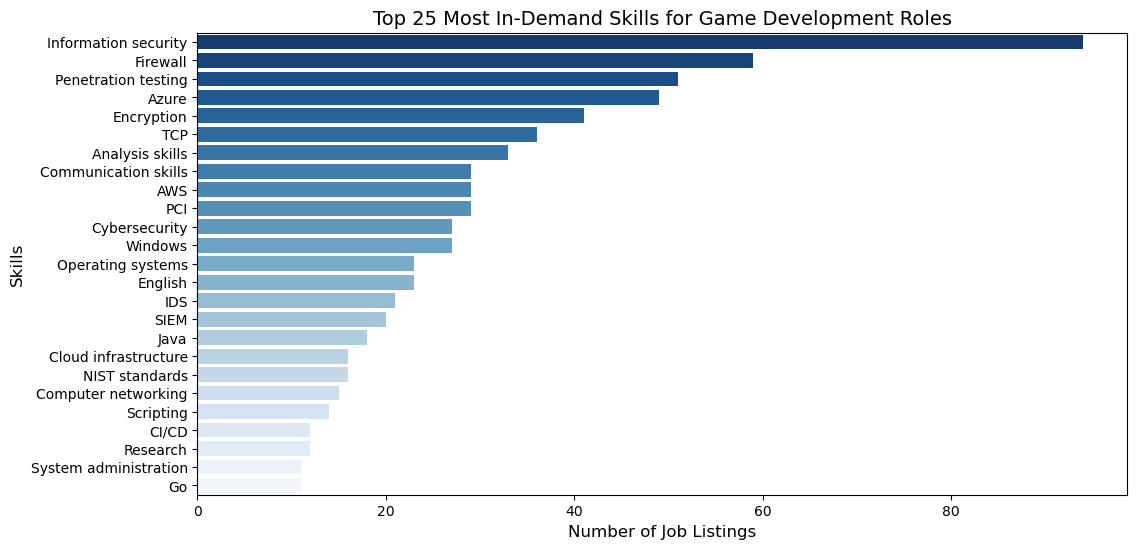

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title("Top 25 Most In-Demand Skills for Game Development Roles", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()

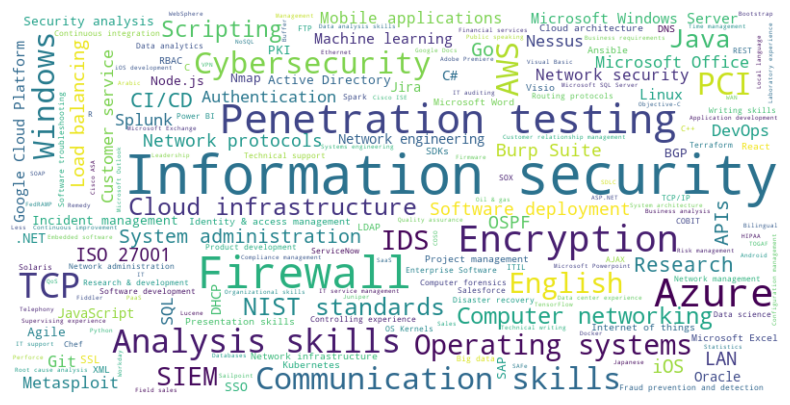

In [60]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### High Paying Companies

In [62]:
top_companies = df_cyber.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))

                   company_name  salary_lpa
195                     Venator        70.0
161    SafeAeon Private Limited        48.0
207                       Xylem        48.0
4                        ALSTOM        48.0
88              Hewlett Packard        48.0
149                  Quick Heal        42.0
94     Indecomm Global Services        42.0
31   BlueBox Infosoft pvt. Ltd.        42.0
65           Exela Technologies        36.0
174            SpanIdea Systems        36.0


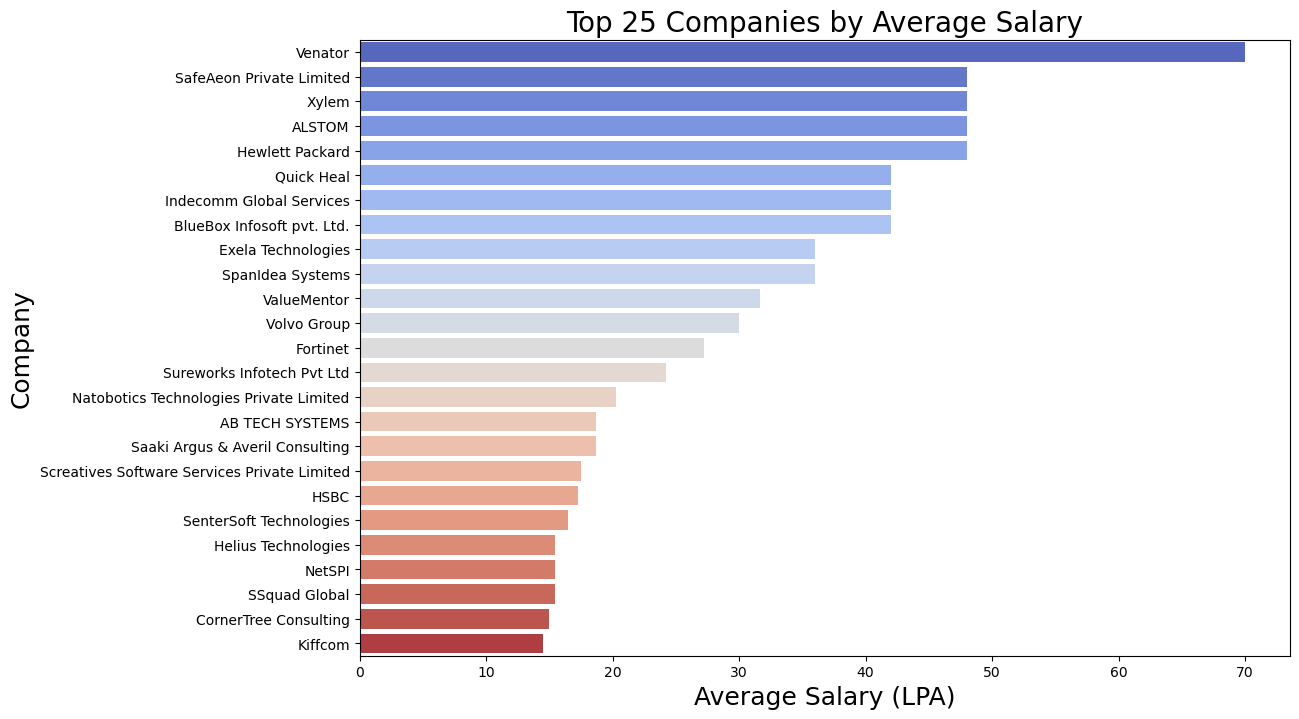

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title("Top 25 Companies by Average Salary", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


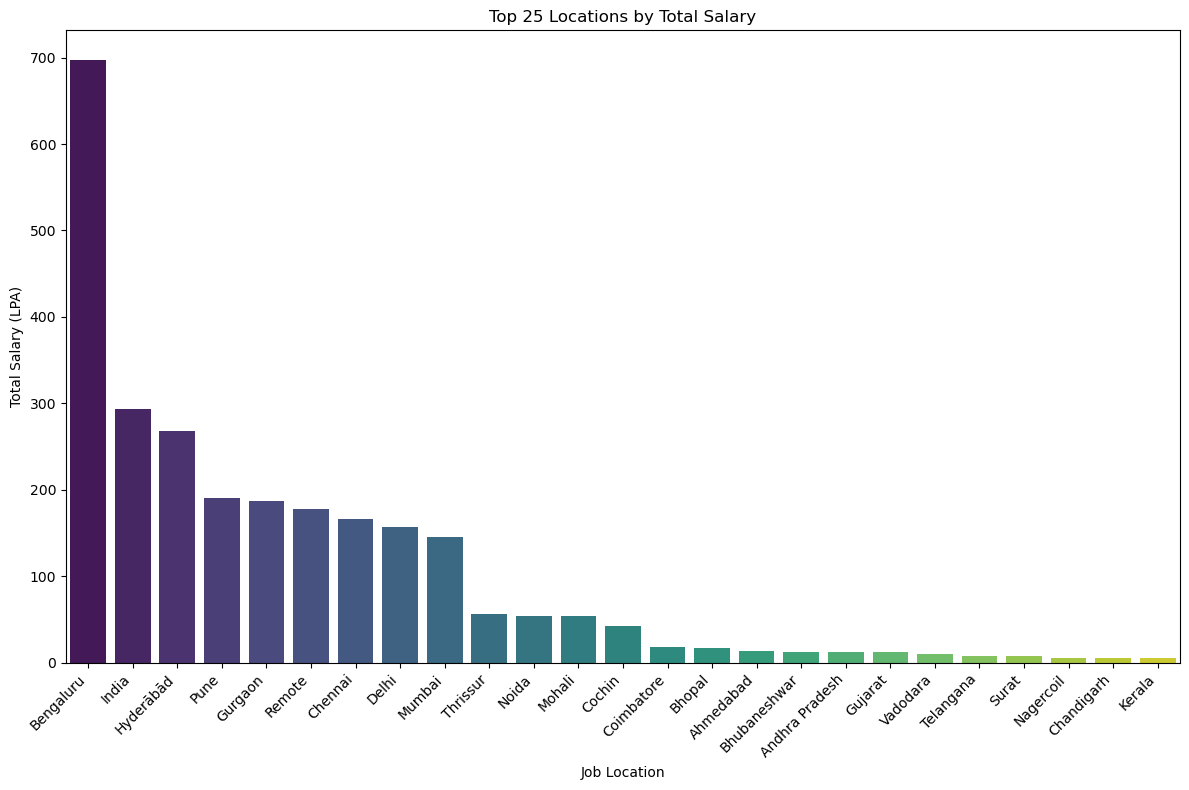

In [64]:
salary_by_location = df_cyber.groupby('job_location')['salary_lpa'].sum()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title('Top 25 Locations by Total Salary')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

### Number of Jobs VS Location

In [66]:
job_count_by_location = df_cyber['job_location'].value_counts()


top_locations = job_count_by_location.head(25)

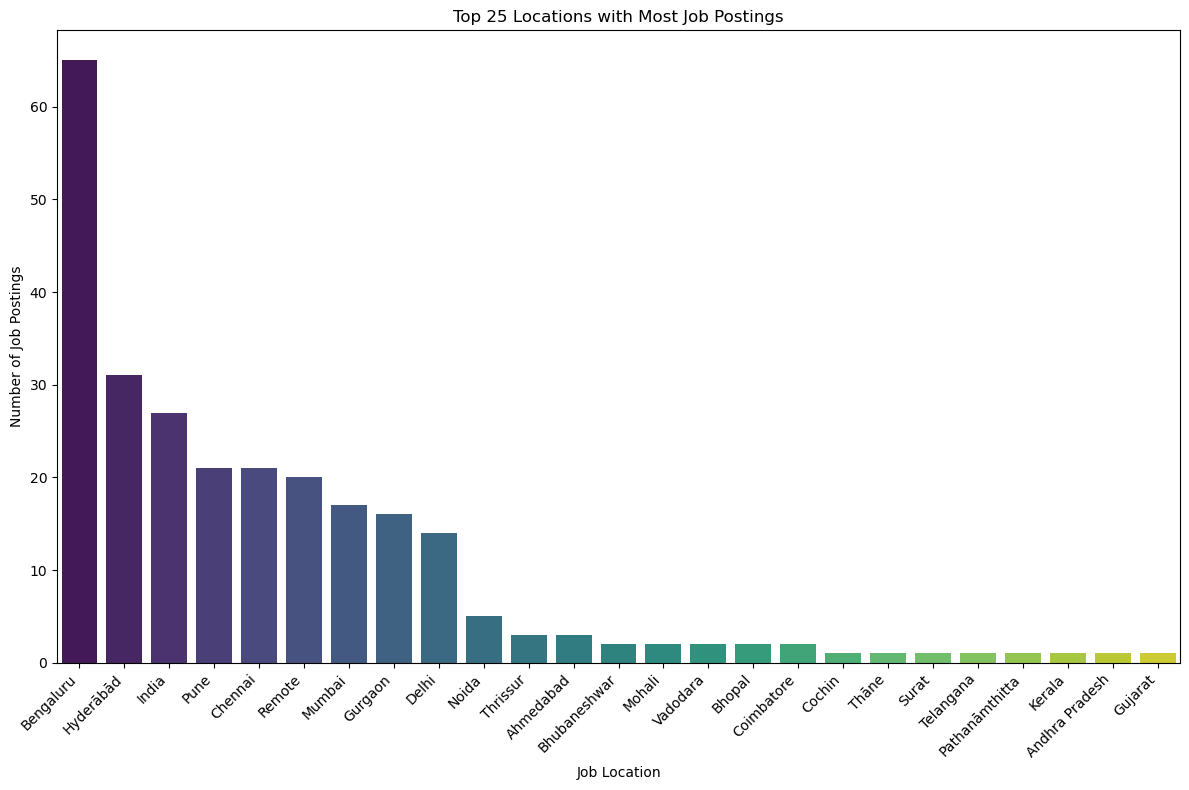

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Number of Job Postings')
plt.title('Top 25 Locations with Most Job Postings')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

### Highest Paying Job Roles

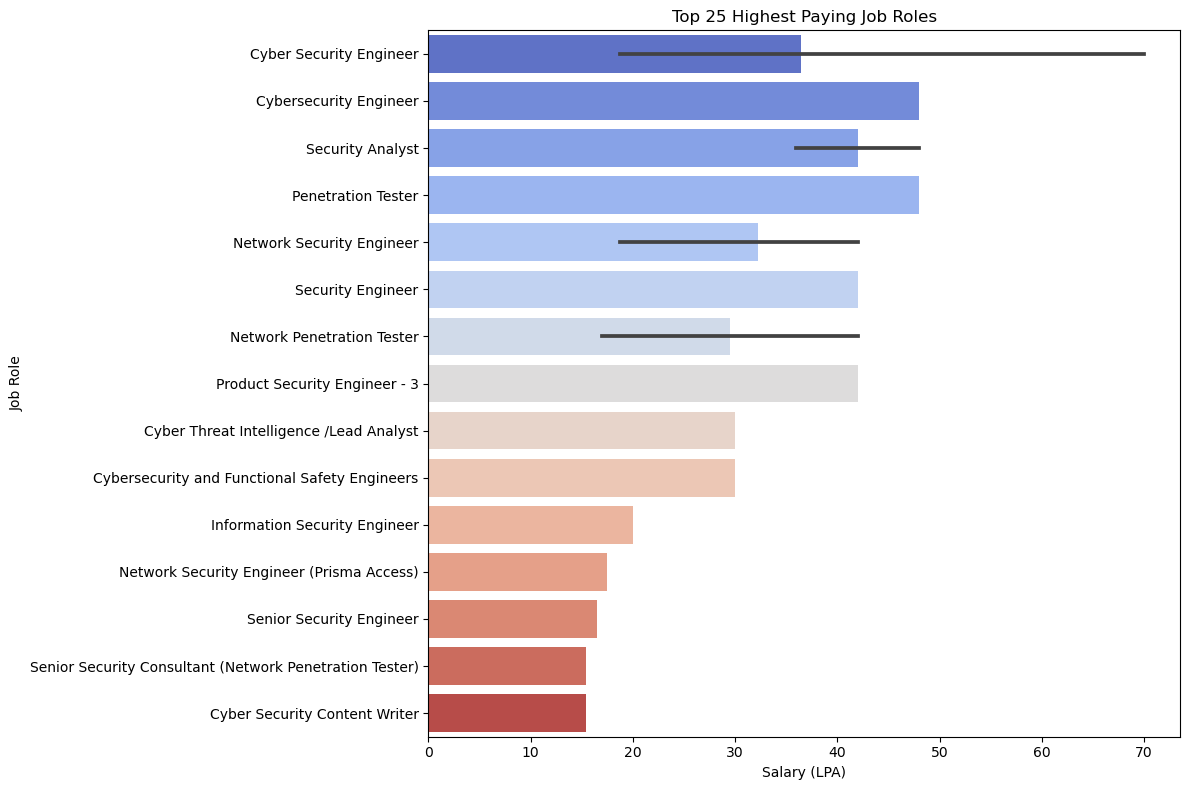

In [69]:
top_roles_by_salary = df_cyber[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm')


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title('Top 25 Highest Paying Job Roles')


plt.tight_layout()
plt.show()

### Salary Distribution Across Job Roles

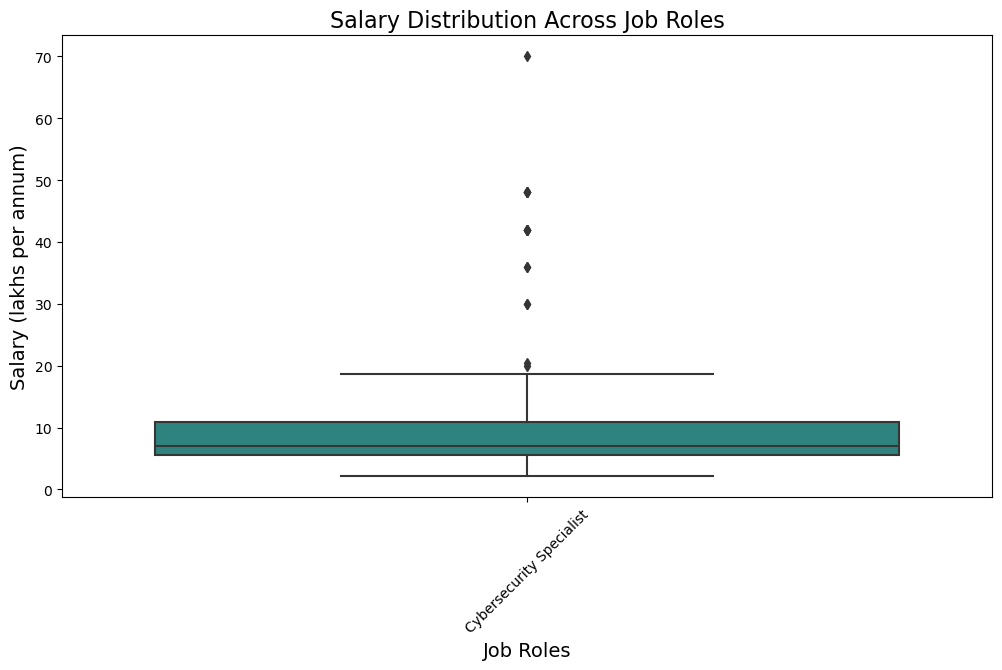

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns


df_cyber_clean = df_cyber[df_cyber['salary_lpa'] > 0]


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_cyber_clean,
    x='standardized_job_role',
    y='salary_lpa',
    palette='viridis'
)
plt.title('Salary Distribution Across Job Roles', fontsize=16)
plt.xlabel('Job Roles', fontsize=14)
plt.ylabel('Salary (lakhs per annum)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


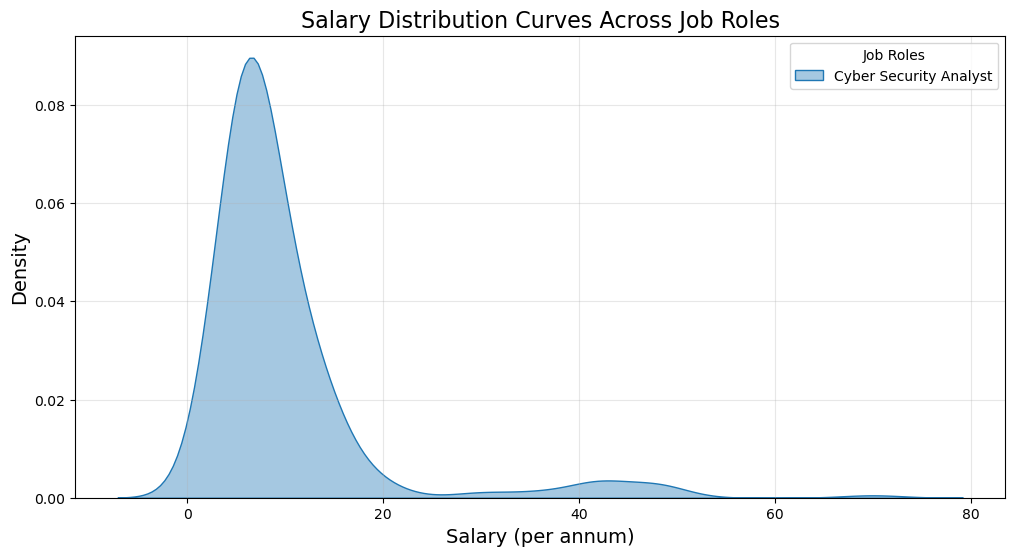

In [72]:

df_cyber_clean = df_cyber[df_cyber['salary_lpa'] > 0]


plt.figure(figsize=(12, 6))



sns.kdeplot(
    data=df_cyber_clean,
    x='salary_lpa',
    label='Cyber Security Analyst',
    fill=True,  
    alpha=0.4  
)


plt.title('Salary Distribution Curves Across Job Roles', fontsize=16)
plt.xlabel('Salary (per annum)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title="Job Roles", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


### Company Rating VS Average Salary

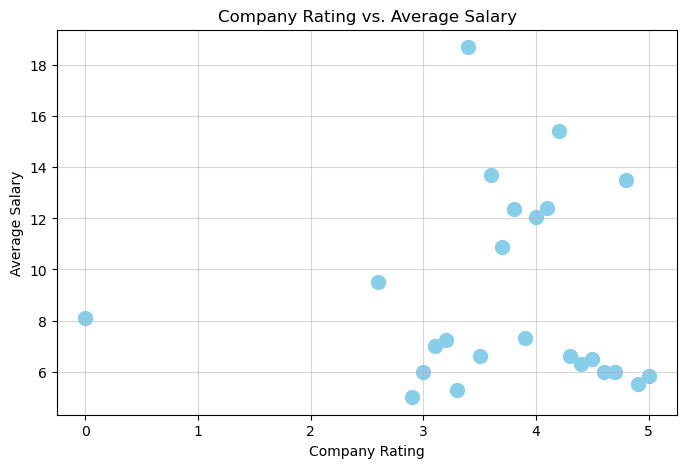

In [74]:
rating_avg_salary = df_cyber.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title('Company Rating vs. Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()

### Remote VS On site

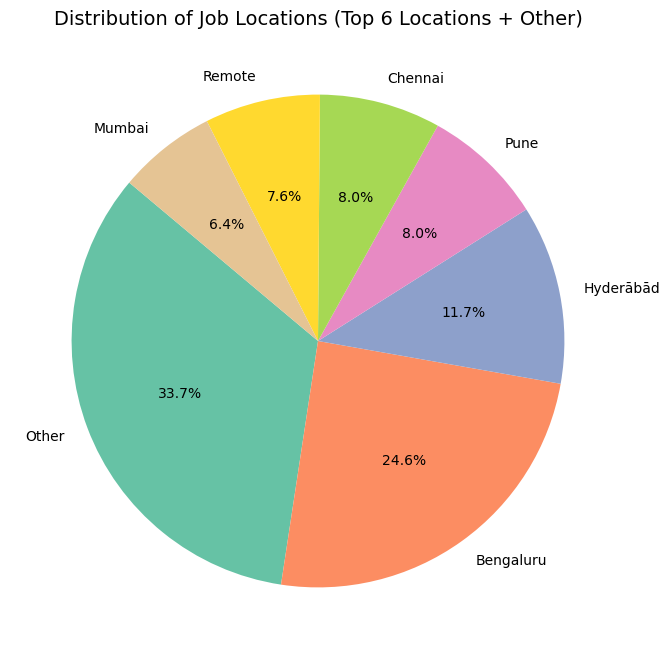

In [76]:

location_counts = df_cyber[df_cyber['job_location'] != 'India']['job_location'].value_counts()


top_locations = location_counts.head(6).index


df_cyber['job_location_grouped'] = df_cyber['job_location'].apply(lambda x: x if x in top_locations else 'Other')


location_grouped_counts = df_cyber['job_location_grouped'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))


plt.title("Distribution of Job Locations (Top 6 Locations + Other)", fontsize=14)


plt.show()